In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [2]:
# Define variables
n = 8               # Sample size
alpha = 0.005       # Desired Type I error
sigma_0 = 2.5      # In control process
s1=4 # Out of control process


In [3]:
def f(h):
    """
    Calculates the value of the equation f(h) that needs to be solved to find the value of h.

    Parameters:
        h (float): The value of h.
        n (int): The sample size.
        alpha (float): The significance level.

    Returns:
        The value of the equation f(h).
    """
    if h==0:
        return alpha
    elif h==1:
        return 1-alpha
    else:
        return chi2.cdf((((n-1)*np.log(h))/(h-1)),n-1)-chi2.cdf((((n-1)*h*np.log(h))/(h-1)),n-1)-1+alpha

def bisection_fun(a, b, tol, MaxIter=100):
    """
    Find the root of a function within a given interval using the bisection method.
    
    Parameters
    ----------
    a : float
        Left endpoint of the interval.
    b : float
        Right endpoint of the interval.
    tol : float
        Tolerance for the absolute error.
    MaxIter : int, optional
        Maximum number of iterations, defaults to 100.
    
    Returns
    -------
    root : float
        Approximation of the root.
    n_iter : int
        Number of iterations performed.
    abs_err : float
        Absolute error of the approximation.
    """
    xl, xr, n = a, b, 0
    
    while True:
        n += 1
        c = (xl + xr) / 2
        
        if np.abs(f(c)) <= tol:
            return c, n, np.abs(xr - xl)
        else:
            if np.sign(f(c)) == np.sign(f(xl)):
                xl = c
            else:
                xr = c
        if n > MaxIter:
            print("Max iterations exceeded")
            return c, n, np.abs(xr - xl)

def ARL_1_fun (n,LCL,UCL,s1):
    """
    Calculates the average run length (ARL) for a one-sided control chart, based on the specified parameters.

    Parameters:
    n (int): the sample size
    LCL (float): the lower control limit
    UCL (float): the upper control limit
    s1 (float): the sifted standard deviation

    Returns:
    ARL (float): the average run length for the control chart
    """
    dof=(n-1)
    var1=s1**2
    Beta=chi2.cdf(dof*UCL/var1,dof)-chi2.cdf(dof*LCL/var1,dof)
    Power=1-Beta
    ARL=1/Power
    return ARL,Beta

In [4]:
f_h_list=[]
h_list=[]
for h in np.arange(0,1,0.01): # loop through all the values of h
    f_h=f(h) # calculate the value of f(h) for each value of h
    f_h_list.append(f_h) # append the value of f(h) to a list
    h_list.append(h) # append the value of h to a list

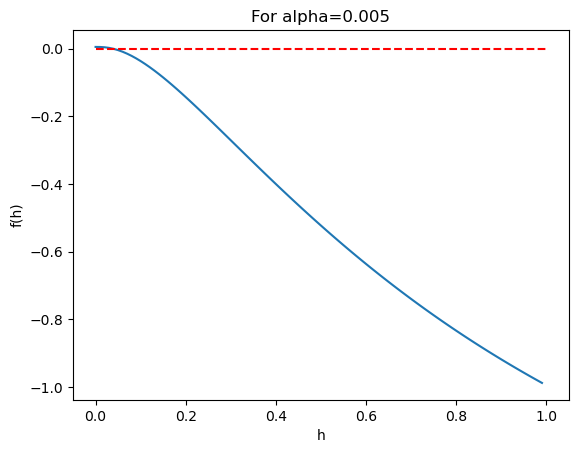

In [5]:
f_h_list=[]
h_list=[]
for h in np.arange(0,1,0.01): # loop through all the values of h
    f_h=f(h) # calculate the value of f(h) for each value of h
    f_h_list.append(f_h) # append the value of f(h) to a list
    h_list.append(h) # append the value of h to a list

# Just to check the function, not part of the solution
plt.figure()
plt.plot(h_list,f_h_list) # plot the values of f(h) against h
plt.hlines(0,0,1,linestyles='dashed',colors='red') # plot a horizontal line at y=0
plt.xlabel('h') # set x-axis label
plt.ylabel('f(h)') # set y-axis label
plt.title(f'For alpha={alpha}')
plt.show()

In [6]:
h,actual_iteration,actual_tolerance=bisection_fun(0,1,1e-10) #Find the root of the function f(h) using the bisection method with initial values 0 and 1, and a tolerance of 1e-10
print(f'Root at h={h}, Error={actual_tolerance}, Iterations needed={h}') #Print the results

Root at h=0.037973104044795036, Error=3.725290298461914e-09, Iterations needed=0.037973104044795036


In [7]:
h1_unbiased=(n-1)*h*np.log(h)/(h-1) #Calculate the value of h1
h2_unbiased=(n-1)*np.log(h)/(h-1) #Calculate the value of h2
print(f"h1={h1_unbiased:.4f}, h2={h2_unbiased:.4f}") #Print the results
print("Obsever that h1 is less than but close to 1 while h2 is greater than 1")

h1=0.9038, h2=23.7999
Obsever that h1 is less than but close to 1 while h2 is greater than 1


In [8]:
UCL_unbiased=(sigma_0**2)*h2_unbiased/(n-1) #Calculate the value of the upper control limit
LCL_unbiased=(sigma_0**2)*h1_unbiased/(n-1) #Calculate the value of the lower control limit
print(f"LCL_unbiased={LCL_unbiased:.4f}, UCL_unbiased={UCL_unbiased:.4f}") #Print the results
ARL1_Unbiased,Beta_unbiased=ARL_1_fun(n,LCL_unbiased,UCL_unbiased,s1)
print(f'Beta_unbiased={Beta_unbiased:.4f}, ARL1_Unbiased={ARL1_Unbiased:.4f}')

LCL_unbiased=0.8069, UCL_unbiased=21.2499
Beta_unbiased=0.7678, ARL1_Unbiased=4.3064


In [9]:
LCL_biased=(sigma_0**2)*chi2.ppf(alpha/2,n-1)/(n-1) #Calculate the value of the lower control limit
UCL_biased=(sigma_0**2)*chi2.ppf(1-alpha/2,n-1)/(n-1)   #Calculate the value of the upper control limit
print(f"LCL_biased={LCL_biased:.4f}, UCL_biased={UCL_biased:.4f}") #Print the results
ARL1_biased,Beta_biased=ARL_1_fun(n,LCL_biased,UCL_biased,s1)
print(f'Beta_unbiased={Beta_biased:.4f}, ARL1_Unbiased={ARL1_biased:.4f}')

LCL_biased=0.7093, UCL_biased=19.6789
Beta_unbiased=0.7180, ARL1_Unbiased=3.5457


In [10]:
s1_list=[]#For plotting reasons, not part of the solution
ARL1_Unbiased_list=[]#For plotting reasons, not part of the solution
ARL1_Biased_list=[]#For plotting reasons, not part of the solution
ARL1_Unbiased_list=[]#For plotting reasons, not part of the solution
for s1 in np.arange(sigma_0*0.1,sigma_0*2,0.001):
    #Unbiased
    ARL1_Unbiased,Beta_unbiased=ARL_1_fun(n,LCL_unbiased,UCL_unbiased,s1)
    ARL1_Unbiased_list.append(ARL1_Unbiased) #For plotting reasons, not part of the solution
    #Biased
    ARL1_Biased,Beta_Biased=ARL_1_fun(n,LCL_biased,UCL_biased,s1)
    ARL1_Biased_list.append(ARL1_Biased) #For plotting reasons, not part of the solution

    s1_list.append(s1) #For plotting reasons, not part of the solution

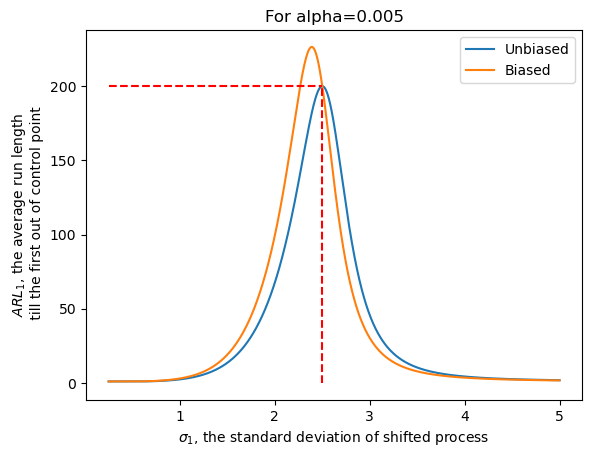

In [11]:
plt.figure()
plt.plot(s1_list,ARL1_Unbiased_list)
plt.plot(s1_list,ARL1_Biased_list)
plt.vlines(sigma_0,0,alpha**-1,linestyles='dashed',colors='red') #Adding vertical line at sigma_0
plt.hlines(alpha**-1,sigma_0*0.1,sigma_0,linestyles='dashed',colors='red') #Adding horizontal line at ARL_1
plt.xlabel('$\sigma_1$, the standard deviation of shifted process')
plt.ylabel('$ARL_1$, the average run length\n till the first out of control point')
plt.legend(['Unbiased','Biased'])
plt.title(f'For alpha={alpha}')
plt.show()

# Extra (1)
## Now try to find the effect of alpha on the unbiased plot

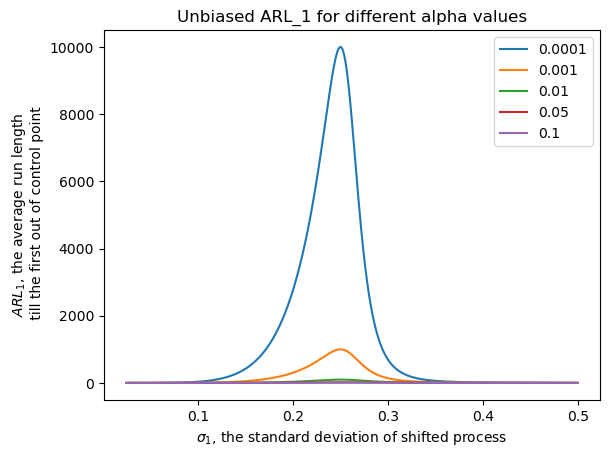

In [12]:
# %%

plt.figure()
n=8 # Define the sampe size
sigma_0=0.25 # Define the in control process 

alpha_list=[]#For plotting reasons, not part of the solution
ARL1_Unbiased_list=[]#For plotting reasons, not part of the solution
ARL1_Biased_list=[]#For plotting reasons, not part of the solution
for alpha in [0.0001,0.001,0.01,0.05,0.1]:
    h,actual_iteration,actual_tolerance=bisection_fun(0,1,1e-10)
    h1_unbiased=(n-1)*h*np.log(h)/(h-1)
    h2_unbiased=(n-1)*np.log(h)/(h-1)
    UCL_unbiased=(sigma_0**2)*h2_unbiased/(n-1)
    LCL_unbiased=(sigma_0**2)*h1_unbiased/(n-1)   
    LCL_biased=(sigma_0**2)*chi2.ppf(alpha/2,n-1)/(n-1)
    UCL_biased=(sigma_0**2)*chi2.ppf(1-alpha/2,n-1)/(n-1)
    alpha_list.append(alpha) #For plotting reasons, not part of the solution

    s1_list=[]#For plotting reasons, not part of the solution
    ARL1_Unbiased_list=[]#For plotting reasons, not part of the solution
    ARL1_Biased_list=[]#For plotting reasons, not part of the solution
    ARL1_Unbiased_list=[]#For plotting reasons, not part of the solution
    for s1 in np.arange(sigma_0*0.1,sigma_0*2,0.001):
        #Unbiased
        ARL1_Unbiased,_=ARL_1_fun(n,LCL_unbiased,UCL_unbiased,s1)
        ARL1_Unbiased_list.append(ARL1_Unbiased) #For plotting reasons, not part of the solution
        #Biased
        ARL1_Biased,_=ARL_1_fun(n,LCL_biased,UCL_biased,s1)
        ARL1_Biased_list.append(ARL1_Biased) #For plotting reasons, not part of the solution

        s1_list.append(s1) #For plotting reasons, not part of the solution

    plt.plot(s1_list,ARL1_Unbiased_list)
    #plt.plot(s1_list,ARL1_Biased_list)
    #plt.vlines(sigma_0,0,alpha**-1,linestyles='dashed',colors='red',label=None) #Adding vertical line at sigma_0
    #plt.hlines(alpha**-1,sigma_0*0.1,sigma_0,linestyles='dashed',colors='red',label=None) #Adding horizontal line at ARL_1
    plt.xlabel('$\sigma_1$, the standard deviation of shifted process')
    plt.ylabel('$ARL_1$, the average run length\n till the first out of control point')
    #plt.title(f'For alpha={alpha}')
    #plt.legend(['Unbiased','Biased'])
    #plt.show()
plt.title(f'Unbiased ARL_1 for different alpha values')
plt.legend(alpha_list)
plt.show()

# Extra (1)
## Now try to find the effect of alpha on the biased plot

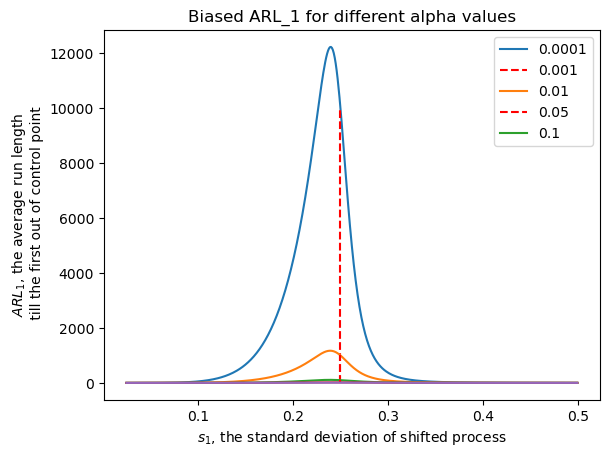

In [13]:
# %%
# Now try to find the effect of alpha on the biased plot
plt.figure()
n=8 # Define the sampe size
sigma_0=0.25 # Define the in control process 

alpha_list=[]#For plotting reasons, not part of the solution
ARL1_Unbiased_list=[]#For plotting reasons, not part of the solution
ARL1_Biased_list=[]#For plotting reasons, not part of the solution
for alpha in [0.0001,0.001,0.01,0.05,0.1]:
    h,actual_iteration,actual_tolerance=bisection_fun(0,1,1e-10)
    h1_unbiased=(n-1)*h*np.log(h)/(h-1)
    h2_unbiased=(n-1)*np.log(h)/(h-1)
    UCL_unbiased=(sigma_0**2)*h2_unbiased/(n-1)
    LCL_unbiased=(sigma_0**2)*h1_unbiased/(n-1)   
    LCL_biased=(sigma_0**2)*chi2.ppf(alpha/2,n-1)/(n-1)
    UCL_biased=(sigma_0**2)*chi2.ppf(1-alpha/2,n-1)/(n-1)
    alpha_list.append(alpha) #For plotting reasons, not part of the solution

    s1_list=[]#For plotting reasons, not part of the solution
    ARL1_Unbiased_list=[]#For plotting reasons, not part of the solution
    ARL1_Biased_list=[]#For plotting reasons, not part of the solution
    ARL1_Unbiased_list=[]#For plotting reasons, not part of the solution
    for s1 in np.arange(sigma_0*0.1,sigma_0*2,0.001):
        #Unbiased
        ARL1_Unbiased,_=ARL_1_fun(n,LCL_unbiased,UCL_unbiased,s1)
        ARL1_Unbiased_list.append(ARL1_Unbiased) #For plotting reasons, not part of the solution
        #Biased
        ARL1_Biased,_=ARL_1_fun(n,LCL_biased,UCL_biased,s1)
        ARL1_Biased_list.append(ARL1_Biased) #For plotting reasons, not part of the solution

        s1_list.append(s1) #For plotting reasons, not part of the solution

    #plt.plot(s1_list,ARL1_Unbiased_list)
    plt.plot(s1_list,ARL1_Biased_list)
    plt.vlines(sigma_0,0,alpha**-1,linestyles='dashed',colors='red',label=None) #Adding vertical line at sigma_0
    #plt.hlines(alpha**-1,sigma_0*0.1,sigma_0,linestyles='dashed',colors='red',label=None) #Adding horizontal line at ARL_1
    plt.xlabel('$s_1$, the standard deviation of shifted process')
    plt.ylabel('$ARL_1$, the average run length\n till the first out of control point')
    #plt.title(f'For alpha={alpha}')
    #plt.legend(['Unbiased','Biased'])
    #plt.show()
plt.title(f'Biased ARL_1 for different alpha values')
plt.legend(alpha_list)
plt.show()
# %%
